<a href="https://colab.research.google.com/github/ks-yahagi/EU_M_Math-Repository/blob/main/shisyuu_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mp1
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

'%.3f'

In [ ]:
#繊維方向の弾性係数(経路間隔を変えて)
#経路間隔1mmの弾性係数[GPa]
y1=np.array([90.8779822,88.6317374,96.1076933,96.1712144,78.0895476,96.5455007,75.8337357])
#経路間隔1.4mmの弾性係数[GPa]
y14=np.array([88.4797093,87.2542191,99.2836036,87.2921697,81.6554312,88.2776233,92.7803548])
#経路間隔2mmの弾性係数[GPa]
y2=np.array([71.9162997,68.1580654,85.7093929,80.5596253,60.5266254,75.1686785,78.7198771,76.6704911])

#弾性係数の単位を[Pa]に変更
def Pa(a):
  return a*(10**9)

y1=Pa(y1)
y14=Pa(y14)
y2=Pa(y2)

print(Pa(y1))
print(Pa(y14))
print(Pa(y2))

[9.088e+19 8.863e+19 9.611e+19 9.617e+19 7.809e+19 9.655e+19 7.583e+19]
[8.848e+19 8.725e+19 9.928e+19 8.729e+19 8.166e+19 8.828e+19 9.278e+19]
[7.192e+19 6.816e+19 8.571e+19 8.056e+19 6.053e+19 7.517e+19 7.872e+19
 7.667e+19]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('drive/My Drive/リチ1.csv', encoding="shift-jis")
data.head()

,1 _ 1,Unnamed: 1,Unnamed: 2
0,時間,試験力,ストローク
1,sec,N,mm
2,0,-0.08424123,0.0001
3,0.01,-0.07947286,0.0006333333
4,0.02,-0.0667572,0.001333333


In [ ]:
data=data.drop(range(2))
data.head()

,1 _ 1,Unnamed: 1,Unnamed: 2
2,0,-0.08424123,0.0001
3,0.01,-0.07947286,0.0006333333
4,0.02,-0.0667572,0.001333333
5,0.03,-0.05245209,0.002033333
6,0.04,-0.04768372,0.002666667


In [ ]:
print(data)

        1 _ 1   Unnamed: 1    Unnamed: 2
2           0  -0.08424123        0.0001
3        0.01  -0.07947286  0.0006333333
4        0.02   -0.0667572   0.001333333
5        0.03  -0.05245209   0.002033333
6        0.04  -0.04768372   0.002666667
...       ...          ...           ...
18824  188.22     42.42261       11.7639
18825  188.23     10.38074      11.76453
18826  188.24    0.9155273      11.76517
18827  188.25   -0.1700719      11.76543
18828  188.26   -0.2082189      11.76547

[18827 rows x 3 columns]


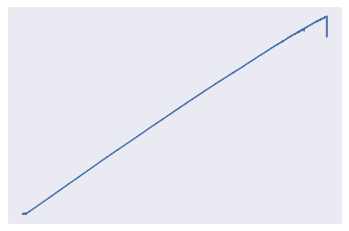

In [ ]:
x = data['Unnamed: 2']
y = data['Unnamed: 1']

plt.plot(x,y)
plt.xticks([])#?
plt.yticks([])#?
plt.grid(True)
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np

# Initialize figure with 4 3D subplots
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}],
           [{'type': 'surface'}, {'type': 'surface'}]])

# Generate data
x = np.linspace(-0.08, 0.08, 16)
y = np.linspace(-0.08, 0.08, 16)
z = np.linspace(-1,1,20)
xGrid, yGrid = np.meshgrid(y, x)
z = (1/2)*(0.6498*xGrid ** 2 - 0.6498*yGrid ** 2)
z2=(1/2)*(2.1952*xGrid ** 2 - 0.0792*yGrid ** 2)
z3=(1/2)*(0.0792*xGrid ** 2 - 2.1952*yGrid ** 2)

# adding surfaces to subplots.
fig.add_trace(
    go.Surface(x=x, y=y, z=z, colorscale='Viridis', showscale=False),
    row=1, col=1)

fig.add_trace(
    go.Surface(x=x, y=y, z=z2, colorscale='RdBu', showscale=False),
    row=1, col=2)

fig.add_trace(
    go.Surface(x=x, y=y, z=z3, colorscale='YlOrRd', showscale=False),
    row=2, col=1)

fig.update_layout(
    title_text='3D subplots with different colorscales',
    height=1000,
    width=1000
)

fig.show()